In [1]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [2]:
path = Path('RiverImages')

fnames = get_image_files(path, folders=['Braided', 'Single', 'Wandering'])

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

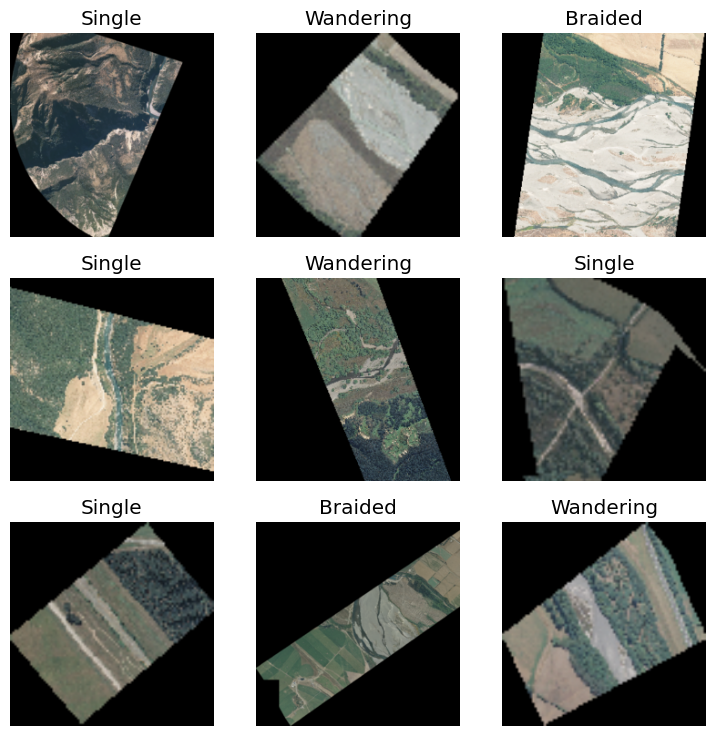

In [3]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = parent_label,
                   splitter = RandomSplitter(),
                   item_tfms = Resize(224))
dsets = dblock.datasets(path)
dls = dblock.dataloaders(path)
dls.show_batch()

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


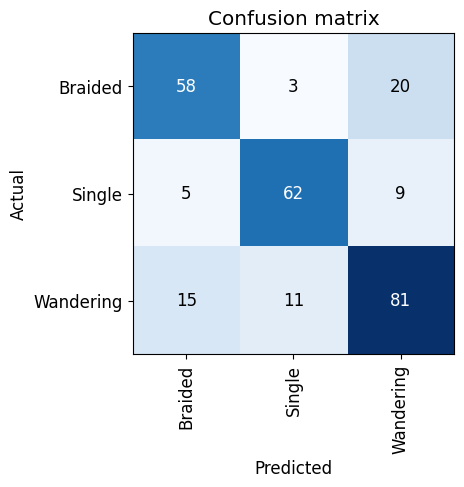

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

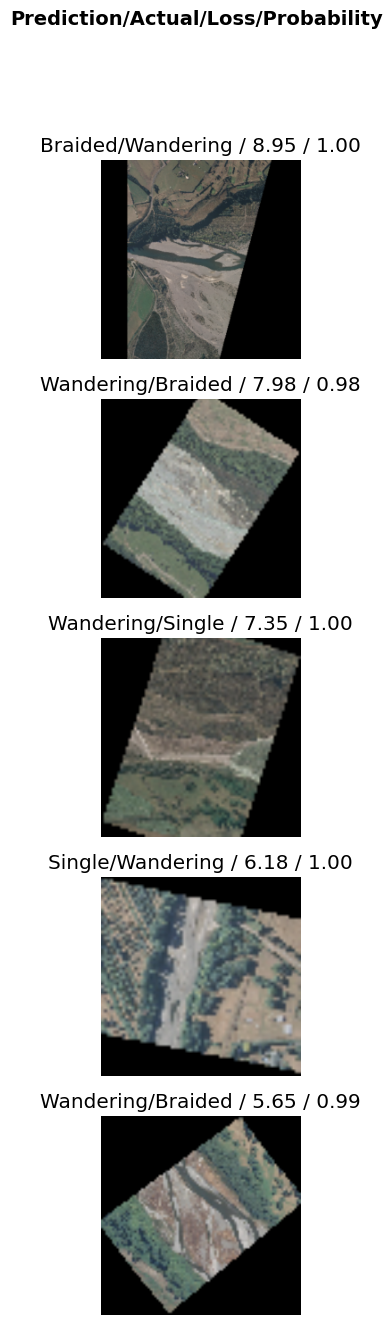

In [6]:
interp.plot_top_losses(5, nrows=5)

In [9]:
learn.export()

In [10]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]